In [1]:
# Immports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.cluster import KMeans
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [2]:
# Loading the processed dataset from phase1
risk_df = pd.read_csv('credit_risk_preprocessed.csv')

In [3]:
# showing up the risk dataframe
risk_df

,Unnamed: 0,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,...,person_home_ownership_cat,loan_intent_cat,loan_grade_cat,cb_person_default_on_file_cat,age_range_cat,income_range_cat,loan_amount_range_cat,person_emp_length_normalized,loan_int_rate_normalized,cb_person_cred_hist_length_normalized
0,1,21,9600.0,OWN,5.0,EDUCATION,B,1000,11.14,0,...,2,1,1,0,0,0,0,0.131579,0.321348,0.000000
1,2,25,9600.0,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,...,0,3,2,0,0,0,1,0.026316,0.418539,0.035714
2,3,23,65500.0,RENT,4.0,MEDICAL,C,35000,15.23,1,...,3,3,2,0,0,2,6,0.105263,0.551124,0.000000
3,4,24,54400.0,RENT,8.0,MEDICAL,C,35000,14.27,1,...,3,3,2,1,0,2,6,0.210526,0.497191,0.071429
4,5,21,9900.0,OWN,2.0,VENTURE,A,2500,7.14,1,...,2,5,0,0,0,0,0,0.052632,0.096629,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32401,32576,57,53000.0,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,...,0,4,2,0,3,2,1,0.026316,0.434831,1.000000
32402,32577,54,120000.0,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,...,0,4,0,0,3,4,3,0.105263,0.116292,0.607143
32403,32578,65,76000.0,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,...,3,2,1,0,4,3,6,0.078947,0.312921,0.928571
32404,32579,56,150000.0,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,...,0,4,1,0,3,4,2,0.131579,0.340449,0.857143


In [4]:
# Basic statistics of the dataset
risk_df.describe()

,Unnamed: 0,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_cat,loan_intent_cat,loan_grade_cat,cb_person_default_on_file_cat,age_range_cat,income_range_cat,loan_amount_range_cat,person_emp_length_normalized,loan_int_rate_normalized,cb_person_cred_hist_length_normalized
count,32406.000000,32406.000000,3.240600e+04,32406.000000,32406.000000,32406.000000,32406.000000,32406.000000,32406.000000,32406.000000,32406.000000,32406.000000,32406.000000,32406.000000,32406.000000,32406.000000,32406.000000,32406.000000,32406.000000
mean,16271.865550,27.725421,6.589523e+04,4.760507,9592.772943,11.016800,0.218725,0.170250,5.809387,1.677097,2.533235,1.220515,0.176788,0.250602,1.866012,1.286182,0.125277,0.314427,0.136050
std,9414.898714,6.185625,5.251945e+04,3.978768,6321.047865,3.083114,0.413388,0.106786,4.053719,1.433170,1.730863,1.167346,0.381495,0.553338,1.289654,1.220055,0.104704,0.173209,0.144776
min,1.000000,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8107.250000,23.000000,3.850000e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.052632,0.172472,0.035714
50%,16227.500000,26.000000,5.500000e+04,4.000000,8000.000000,11.011695,0.000000,0.150000,4.000000,3.000000,3.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.105263,0.314140,0.071429
75%,24431.750000,30.000000,7.920000e+04,7.000000,12250.000000,13.110000,0.000000,0.230000,8.000000,3.000000,4.000000,2.000000,0.000000,0.000000,3.000000,2.000000,0.184211,0.432022,0.214286
max,32580.000000,80.000000,2.039784e+06,38.000000,35000.000000,23.220000,1.000000,0.830000,30.000000,3.000000,5.000000,6.000000,1.000000,5.000000,5.000000,6.000000,1.000000,1.000000,1.000000


In [5]:
# Removing the extra unnamed columns
risk_df.drop(columns=risk_df.columns[0], axis=1, inplace=True)

In [6]:
risk_df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,...,person_home_ownership_cat,loan_intent_cat,loan_grade_cat,cb_person_default_on_file_cat,age_range_cat,income_range_cat,loan_amount_range_cat,person_emp_length_normalized,loan_int_rate_normalized,cb_person_cred_hist_length_normalized
0,21,9600.0,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,...,2,1,1,0,0,0,0,0.131579,0.321348,0.000000
1,25,9600.0,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,...,0,3,2,0,0,0,1,0.026316,0.418539,0.035714
2,23,65500.0,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,...,3,3,2,0,0,2,6,0.105263,0.551124,0.000000
3,24,54400.0,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,...,3,3,2,1,0,2,6,0.210526,0.497191,0.071429
4,21,9900.0,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,...,2,5,0,0,0,0,0,0.052632,0.096629,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32401,57,53000.0,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,...,0,4,2,0,3,2,1,0.026316,0.434831,1.000000
32402,54,120000.0,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,...,0,4,0,0,3,4,3,0.105263,0.116292,0.607143
32403,65,76000.0,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,...,3,2,1,0,4,3,6,0.078947,0.312921,0.928571
32404,56,150000.0,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,...,0,4,1,0,3,4,2,0.131579,0.340449,0.857143


In [22]:
risk_df.columns
risk_df[:2]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,...,person_home_ownership_cat,loan_intent_cat,loan_grade_cat,cb_person_default_on_file_cat,age_range_cat,income_range_cat,loan_amount_range_cat,person_emp_length_normalized,loan_int_rate_normalized,cb_person_cred_hist_length_normalized
0,21,9600.0,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,...,2,1,1,0,0,0,0,0.131579,0.321348,0.000000
1,25,9600.0,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,...,0,3,2,0,0,0,1,0.026316,0.418539,0.035714


In [23]:
# Feature selection required for the models
X = risk_df[['age_range_cat', 'income_range_cat', 'person_home_ownership_cat', 'person_emp_length_normalized', 'loan_intent_cat', 'loan_grade_cat', 'loan_amount_range_cat', 'loan_int_rate_normalized', 'loan_percent_income', 'cb_person_default_on_file_cat', 'cb_person_cred_hist_length_normalized', 'loan_status']]
X[:3]

,age_range_cat,income_range_cat,person_home_ownership_cat,person_emp_length_normalized,loan_intent_cat,loan_grade_cat,loan_amount_range_cat,loan_int_rate_normalized,loan_percent_income,cb_person_default_on_file_cat,cb_person_cred_hist_length_normalized,loan_status
0,0,0,2,0.131579,1,1,0,0.321348,0.10,0,0.000000,0
1,0,0,0,0.026316,3,2,1,0.418539,0.57,0,0.035714,1
2,0,2,3,0.105263,3,2,6,0.551124,0.53,0,0.000000,1


In [12]:
X.columns

Index(['age_range_cat', 'income_range_cat', 'person_home_ownership_cat',
       'person_emp_length_normalized', 'loan_intent_cat', 'loan_grade_cat',
       'loan_amount_range_cat', 'loan_int_rate_normalized',
       'loan_percent_income', 'cb_person_default_on_file_cat',
       'cb_person_cred_hist_length_normalized'],
      dtype='object')

In [20]:
# Output dataset
Y = risk_df[['loan_status']]
Y.columns
Y[:10]

,loan_status
0,0
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [14]:
# Analysing the output dataset
count = Y['loan_status'].value_counts()[0]
print(count)

25318


In [15]:
count1 = Y['loan_status'].value_counts()[1]
print(count1)

7088


# splitting dataset


In [16]:
# Splitting the dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [17]:
count = Y_test['loan_status'].value_counts()[0]
print(count)

5068


In [18]:
count1 = Y_test['loan_status'].value_counts()[1]
print(count1)

1414


In [19]:
# Converting the pandas dataframe to numpy for fitting to the model
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
Y_train = Y_train.to_numpy()
Y_test = Y_test.to_numpy()

Y_train = Y_train.ravel()
Y_train

array([0, 0, 1, ..., 0, 1, 0])

In [20]:
# Printing the shapes of the dataset
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(25924, 11)
(6482, 11)
(25924,)
(6482, 1)


In [21]:
X_train

array([[0.        , 2.        , 0.        , ..., 0.07      , 0.        ,
        0.14285714],
       [0.        , 4.        , 0.        , ..., 0.11      , 1.        ,
        0.14285714],
       [2.        , 1.        , 3.        , ..., 0.4       , 0.        ,
        0.5       ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.13      , 0.        ,
        0.03571429],
       [0.        , 3.        , 3.        , ..., 0.2       , 1.        ,
        0.        ],
       [1.        , 1.        , 3.        , ..., 0.29      , 0.        ,
        0.21428571]])

# Logistic regression

In [22]:
# Function for logistic regression for the dataset
def LogisticRegression_sklearn(X_train, Y_train, X_test):
    logistic_regression_model = LogisticRegression()
    
    # Fitting the train dataset
    logistic_regression_model.fit(X_train, Y_train)
    
    # Saving the model in a pickle file
    save_model(logistic_regression_model, 'logistic_regression_model.pkl')
    Y_pred = logistic_regression_model.predict(X_test)
    return Y_pred

# Evaluation metrics

In [23]:
def get_metrics(y_test, predicted):
    accuracy = accuracy_score(y_test, predicted) # Accuracy\
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, predicted, average='binary', zero_division=0)
    
    print(f'Acuracy of the model: {accuracy}')
    print(f'Precision of the model: {precision}')
    print(f'Recall of the model: {recall}')
    print(f'F1 score of the model: {f1_score}')

    
# Plotting Roc Curve
def plot_roc_curve(y_test, y_pred):
    from sklearn.metrics import roc_curve, roc_auc_score
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()

In [24]:
def save_model(model,filename):
    pickle.dump(model, open(filename, 'wb'))

def load_model(model,filename):
    return pickle.load(open(filename, 'rb'))

In [25]:
logistic_regression_y_pred = LogisticRegression_sklearn(X_train, Y_train, X_test)

In [26]:
get_metrics(Y_test, logistic_regression_y_pred)

Acuracy of the model: 0.8403270595495218
Precision of the model: 0.710789766407119
Recall of the model: 0.4519094766619519
F1 score of the model: 0.5525291828793774


# visualization


In [27]:
cm_lr = confusion_matrix(Y_test, logistic_regression_y_pred)

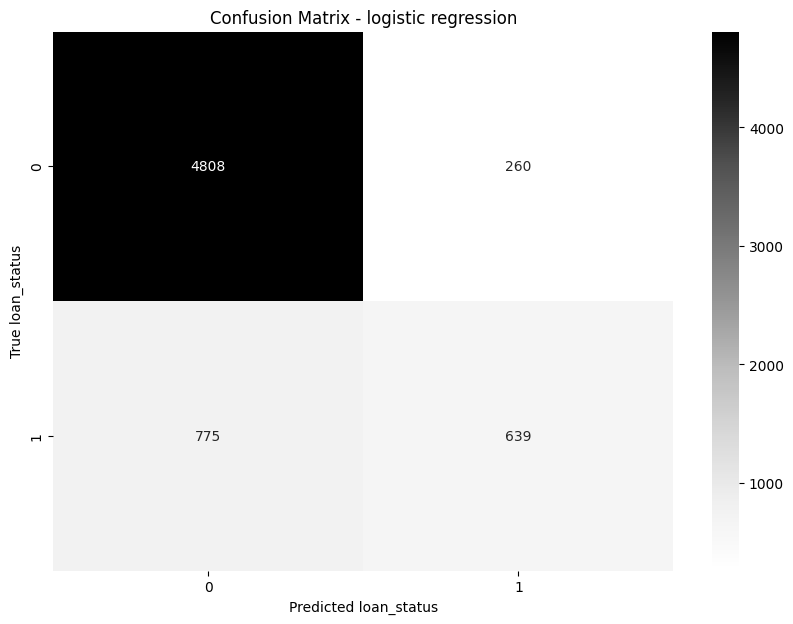

In [28]:
plt.figure(figsize=(10,7))
sns.heatmap(cm_lr, annot=True, fmt='g', cmap='Greys')
plt.xlabel('Predicted loan_status')
plt.ylabel('True loan_status')
plt.title('Confusion Matrix - logistic regression')
plt.show()

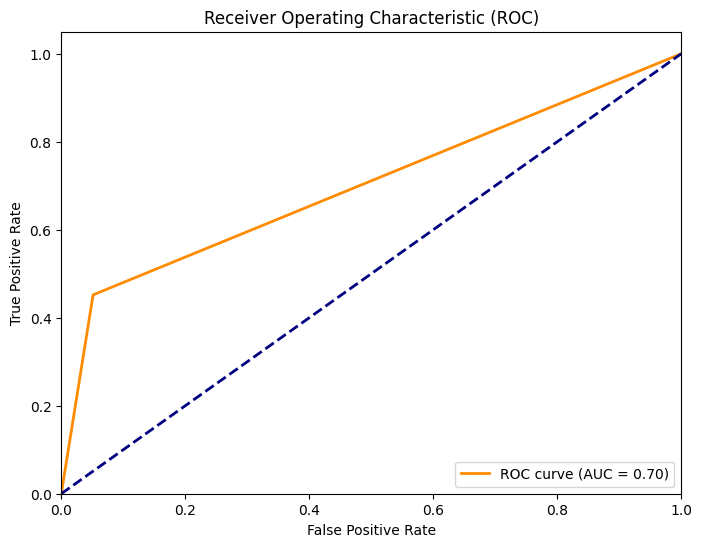

In [29]:
plot_roc_curve(Y_test, logistic_regression_y_pred)

In [30]:
print(classification_report(Y_test, logistic_regression_y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      5068
           1       0.71      0.45      0.55      1414

    accuracy                           0.84      6482
   macro avg       0.79      0.70      0.73      6482
weighted avg       0.83      0.84      0.83      6482



In [31]:
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, Y_train)

LogisticRegression()

In [32]:
coefficients = logistic_regression_model.coef_.flatten()

In [33]:
coeff_df = pd.DataFrame(data=coefficients, index=range(len(coefficients)), columns=['Coefficient'])

In [34]:
coeff_df = coeff_df.reindex(coeff_df.Coefficient.abs().sort_values(ascending=False).index)

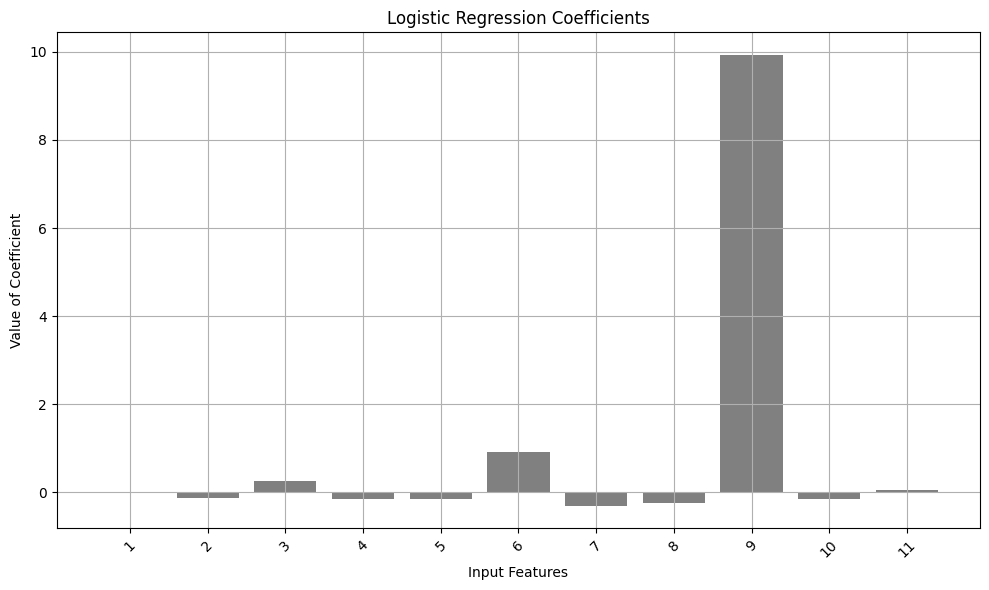

In [35]:
plt.figure(figsize=(10, 6))
plt.bar(coeff_df.index, coeff_df['Coefficient'], color='grey')
plt.xlabel('Input Features')
plt.ylabel('Value of Coefficient')
plt.title('Logistic Regression Coefficients')
plt.xticks(ticks=range(len(coefficients)), labels=range(1, len(coefficients) + 1), rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# SVM

In [36]:
# Function to implment Support vector machine algorithm for the dataset
def SVM_sklearn(X_train, Y_train, X_test):
    svm_model = svm.SVC(kernel='linear')
    svm_model.fit(X_train, Y_train)
    save_model(svm_model, 'svm_model.pkl')
    Y_pred = svm_model.predict(X_test)
    return Y_pred

In [37]:
# Predictions for the test dataset
svm_y_pred = SVM_sklearn(X_train, Y_train, X_test)

In [38]:
get_metrics(Y_test, svm_y_pred)

Acuracy of the model: 0.8404813329219377
Precision of the model: 0.7334152334152334
Recall of the model: 0.4222065063649222
F1 score of the model: 0.5359066427289049


# visualization


In [39]:
cm_svm = confusion_matrix(Y_test, svm_y_pred)

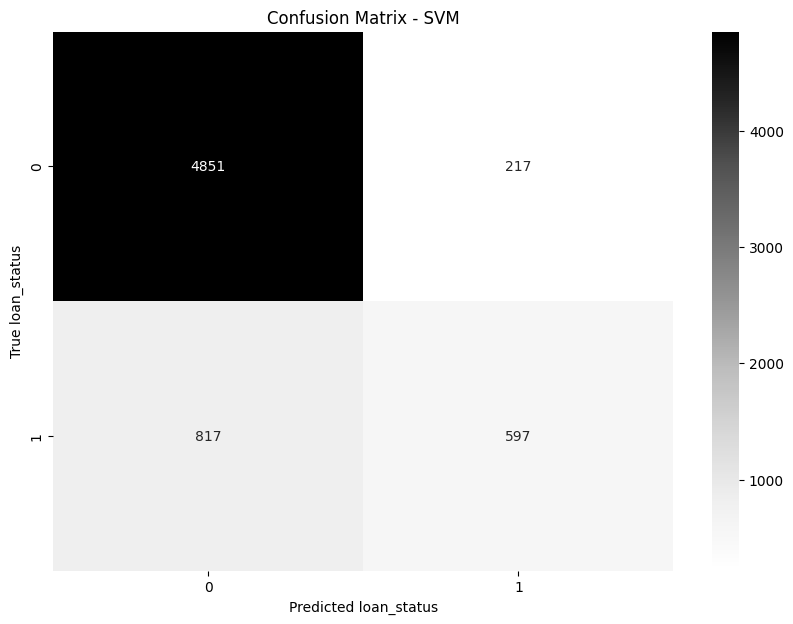

In [40]:
plt.figure(figsize=(10,7))
sns.heatmap(cm_svm, annot=True, fmt='g', cmap='Greys')
plt.xlabel('Predicted loan_status')
plt.ylabel('True loan_status')
plt.title('Confusion Matrix - SVM')
plt.show()

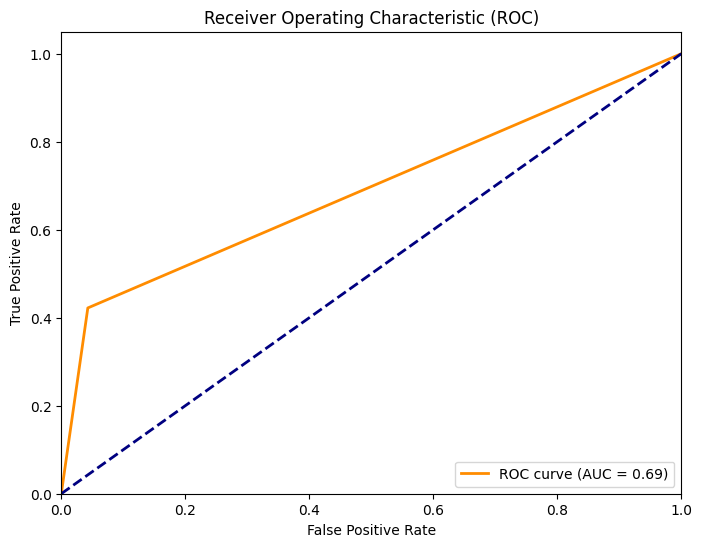

In [41]:
plot_roc_curve(Y_test, svm_y_pred)

In [42]:
print(classification_report(Y_test, svm_y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.90      5068
           1       0.73      0.42      0.54      1414

    accuracy                           0.84      6482
   macro avg       0.79      0.69      0.72      6482
weighted avg       0.83      0.84      0.82      6482



# Random Forest

In [43]:
# Function to implment random forest algorithm for the dataset
def random_forest_sklearn(X_train, Y_train, X_test):
    rf_model = RandomForestClassifier()
    rf_model.fit(X_train, Y_train)
    save_model(rf_model, 'rf_model.pkl')
    Y_pred = rf_model.predict(X_test)
    return Y_pred

In [44]:
rf_y_pred = random_forest_sklearn(X_train, Y_train, X_test)

In [45]:
get_metrics(Y_test, rf_y_pred)

Acuracy of the model: 0.91792656587473
Precision of the model: 0.9281553398058252
Recall of the model: 0.6760961810466761
F1 score of the model: 0.7823240589198037


# visualization

In [46]:
cm_rf = confusion_matrix(Y_test, rf_y_pred)

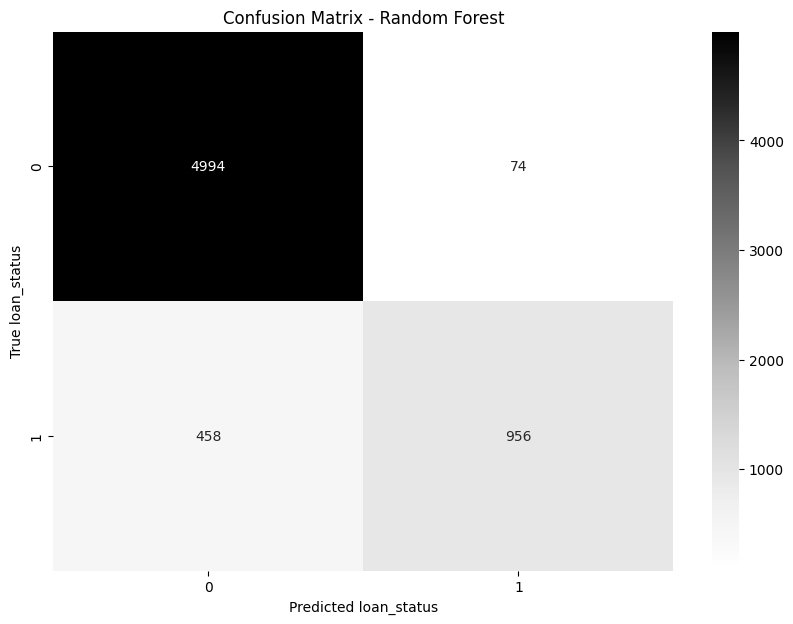

In [47]:
plt.figure(figsize=(10,7))
sns.heatmap(cm_rf, annot=True, fmt='g', cmap='Greys')
plt.xlabel('Predicted loan_status')
plt.ylabel('True loan_status')
plt.title('Confusion Matrix - Random Forest')
plt.show()

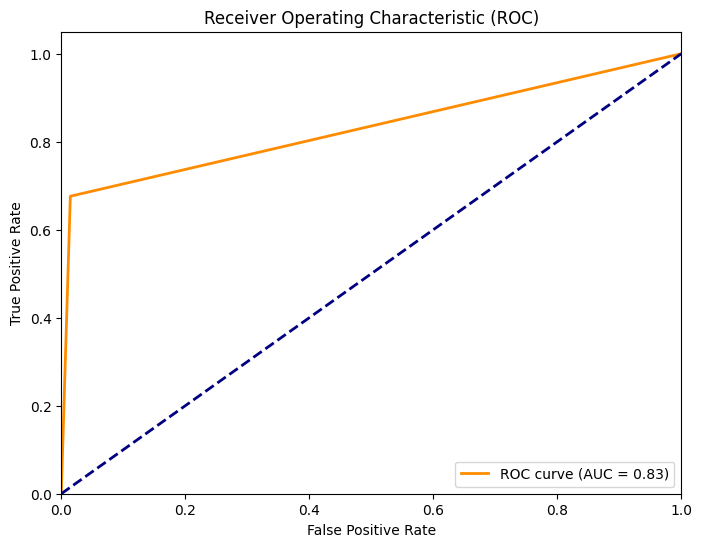

In [48]:
plot_roc_curve(Y_test, rf_y_pred)

In [49]:
print(classification_report(Y_test, rf_y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      5068
           1       0.93      0.68      0.78      1414

    accuracy                           0.92      6482
   macro avg       0.92      0.83      0.87      6482
weighted avg       0.92      0.92      0.91      6482



# Decision Trees 

In [50]:
# Function to implment decision trees algorithm for the dataset
def decision_tree_sklearn(X_train, Y_train, X_test):
    dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    dt_model.fit(X_train, Y_train)
    save_model(dt_model, 'dt_model.pkl')
    Y_pred = dt_model.predict(X_test)
    return Y_pred

In [51]:
decision_tree_y_pred = decision_tree_sklearn(X_train, Y_train, X_test)

In [52]:
get_metrics(Y_test, decision_tree_y_pred)

Acuracy of the model: 0.8651650725084851
Precision of the model: 0.6792828685258964
Recall of the model: 0.7234794908062234
F1 score of the model: 0.7006849315068494


# visualization

In [53]:
cm_decision_tree = confusion_matrix(Y_test, decision_tree_y_pred)

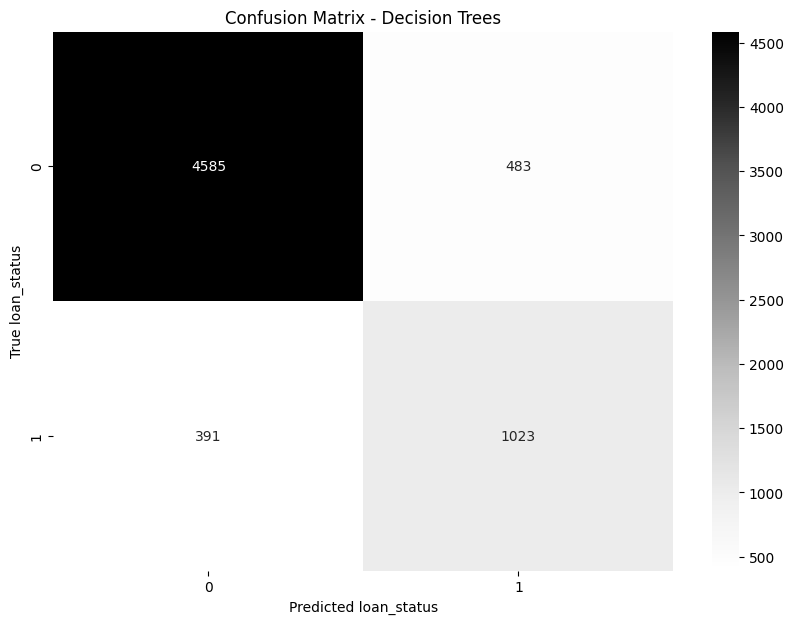

In [54]:
plt.figure(figsize=(10,7))
sns.heatmap(cm_decision_tree, annot=True, fmt='g', cmap='Greys')
plt.xlabel('Predicted loan_status')
plt.ylabel('True loan_status')
plt.title('Confusion Matrix - Decision Trees')
plt.show()

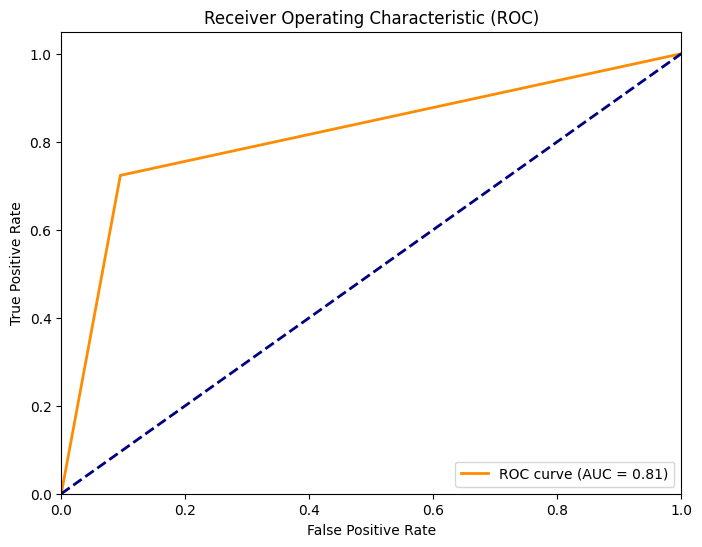

In [55]:
plot_roc_curve(Y_test, decision_tree_y_pred)

In [56]:
print(classification_report(Y_test, decision_tree_y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      5068
           1       0.68      0.72      0.70      1414

    accuracy                           0.87      6482
   macro avg       0.80      0.81      0.81      6482
weighted avg       0.87      0.87      0.87      6482



# XGBoost

In [57]:
# Function to implment XGboost algorithm for the dataset
def xgboost_sklearn(X_train, Y_train, X_test):
    xgboost_model = xgb.XGBClassifier(objective='binary:logistic', seed=42)
    xgboost_model.fit(X_train, Y_train)
    save_model(xgboost_model, 'xgboost_model.pkl')
    Y_pred = xgboost_model.predict(X_test)
    return Y_pred

In [58]:
xgboost_y_pred = xgboost_sklearn(X_train, Y_train, X_test)

In [59]:
get_metrics(Y_test, xgboost_y_pred)

Acuracy of the model: 0.919932119716137
Precision of the model: 0.9209783631232361
Recall of the model: 0.6923620933521923
F1 score of the model: 0.7904723455793297


# visualization

In [60]:
cm_xgbooxt = confusion_matrix(Y_test, xgboost_y_pred)

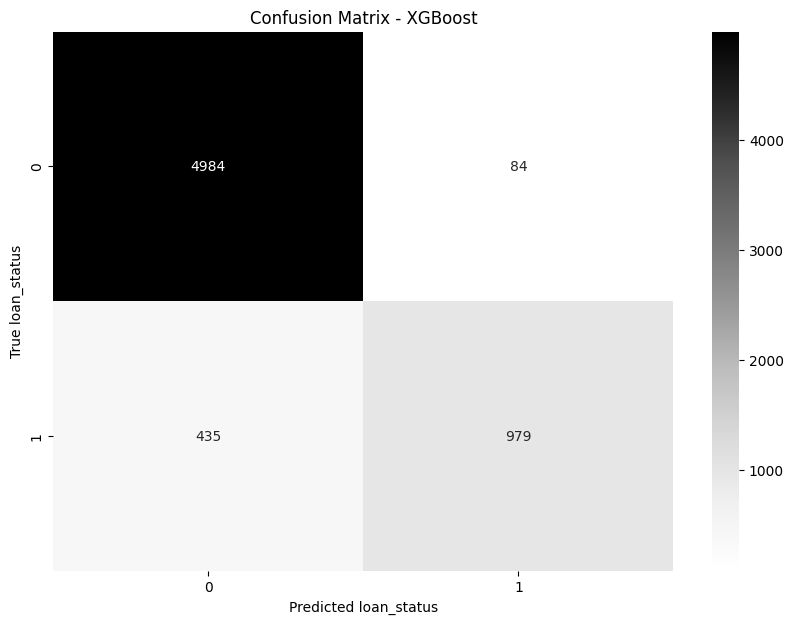

In [61]:
plt.figure(figsize=(10,7))
sns.heatmap(cm_xgbooxt, annot=True, fmt='g', cmap='Greys')
plt.xlabel('Predicted loan_status')
plt.ylabel('True loan_status')
plt.title('Confusion Matrix - XGBoost')
plt.show()

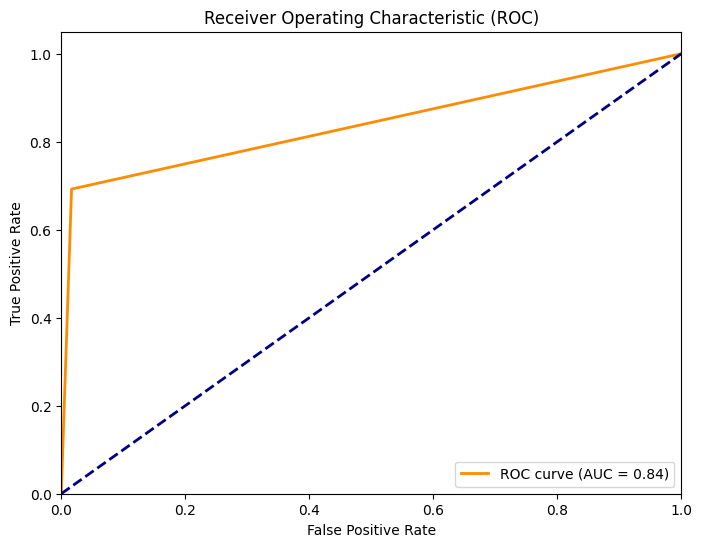

In [62]:
plot_roc_curve(Y_test, xgboost_y_pred)

In [63]:
print(classification_report(Y_test, xgboost_y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      5068
           1       0.92      0.69      0.79      1414

    accuracy                           0.92      6482
   macro avg       0.92      0.84      0.87      6482
weighted avg       0.92      0.92      0.92      6482



# Naive Bayes

In [64]:
# Function to implment Naive Bayes algorithm for the dataset
def naive_bayes_sklearn(X_train, Y_train, X_test):
    naive_bayes_model = GaussianNB()
    naive_bayes_model.fit(X_train, Y_train)
    save_model(naive_bayes_model, 'naive_bayes_model.pkl')
    Y_pred = naive_bayes_model.predict(X_test)
    return Y_pred

In [65]:
nb_y_pred = naive_bayes_sklearn(X_train, Y_train, X_test)

In [66]:
get_metrics(Y_test, nb_y_pred)

Acuracy of the model: 0.8171860536871336
Precision of the model: 0.5739186571981924
Recall of the model: 0.6287128712871287
F1 score of the model: 0.6000674991562605


# visualization

In [67]:
cm_bayes = confusion_matrix(Y_test, nb_y_pred)

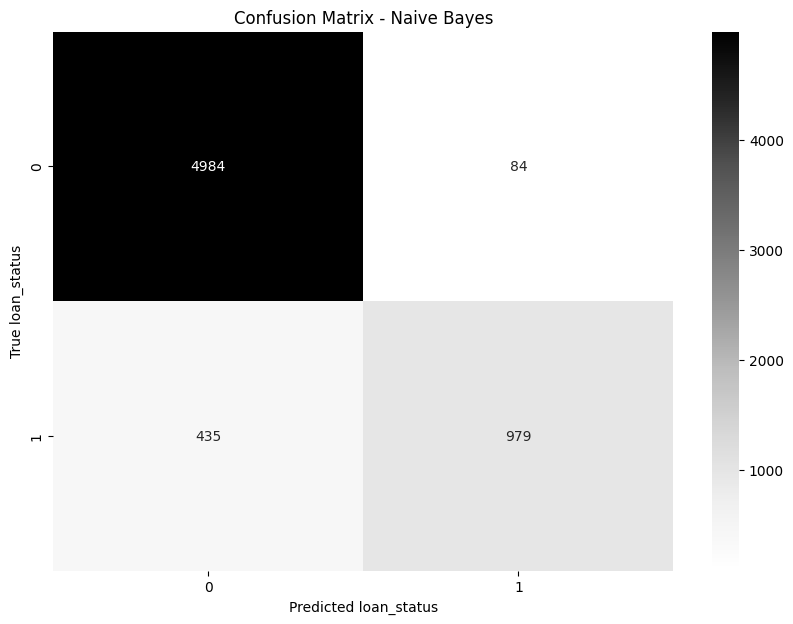

In [68]:
plt.figure(figsize=(10,7))
sns.heatmap(cm_xgbooxt, annot=True, fmt='g', cmap='Greys')
plt.xlabel('Predicted loan_status')
plt.ylabel('True loan_status')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

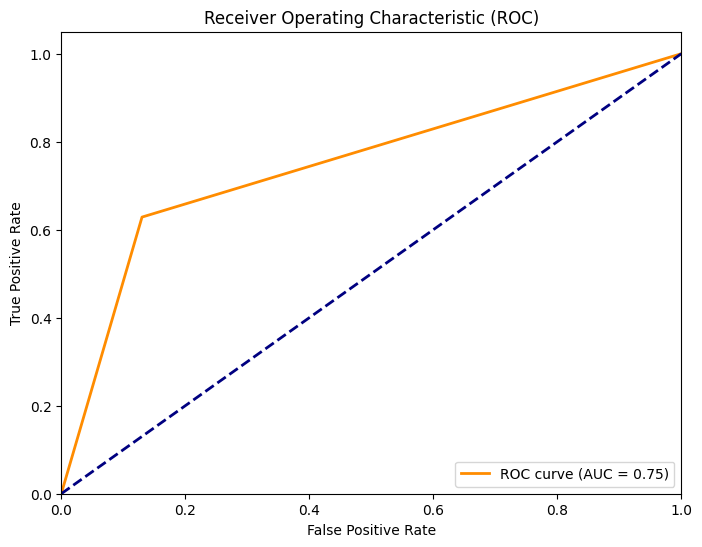

In [69]:
plot_roc_curve(Y_test, nb_y_pred)

In [70]:
print(classification_report(Y_test, nb_y_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      5068
           1       0.57      0.63      0.60      1414

    accuracy                           0.82      6482
   macro avg       0.73      0.75      0.74      6482
weighted avg       0.82      0.82      0.82      6482



# GBM - Gradient Boosting Machines (GBM):

In [71]:
# Function to implment gradient boosting machines algorithm for the dataset
def gbm_sklearn(X_train, Y_train, X_test):
    gbm_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
    gbm_model.fit(X_train, Y_train)
    save_model(gbm_model, 'gbm_model.pkl')
    Y_pred = gbm_model.predict(X_test)
    return Y_pred

In [72]:
gbm_y_pred = gbm_sklearn(X_train, Y_train, X_test)

In [73]:
get_metrics(Y_test, gbm_y_pred)

Acuracy of the model: 0.875038568343104
Precision of the model: 0.7672566371681416
Recall of the model: 0.6131541725601132
F1 score of the model: 0.6816037735849058


# visualization

In [74]:
cm_gbm = confusion_matrix(Y_test, gbm_y_pred)

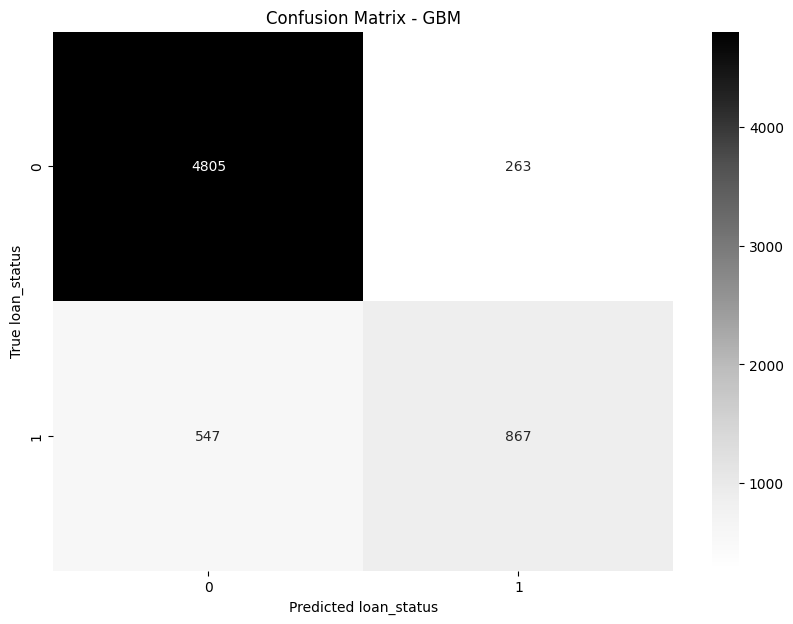

In [75]:
plt.figure(figsize=(10,7))
sns.heatmap(cm_gbm, annot=True, fmt='g', cmap='Greys')
plt.xlabel('Predicted loan_status')
plt.ylabel('True loan_status')
plt.title('Confusion Matrix - GBM')
plt.show()

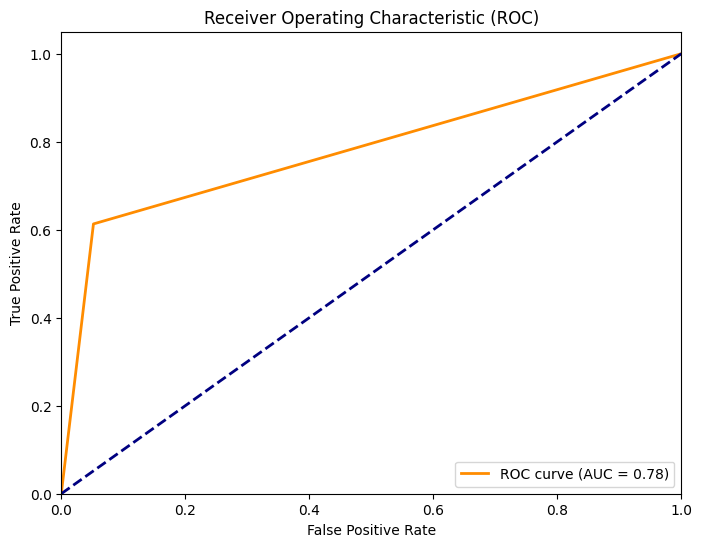

In [76]:
plot_roc_curve(Y_test, gbm_y_pred)

In [77]:
print(classification_report(Y_test, gbm_y_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      5068
           1       0.77      0.61      0.68      1414

    accuracy                           0.88      6482
   macro avg       0.83      0.78      0.80      6482
weighted avg       0.87      0.88      0.87      6482

